
Deterministic Environment Simulation:
Step 1:


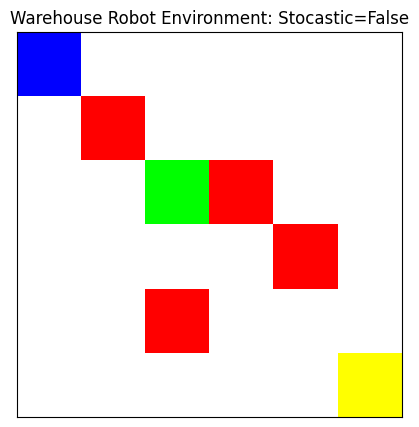

Action: Pick-up
State: (0, 0, False), Reward: -1, Total Reward: -1

Step 2:


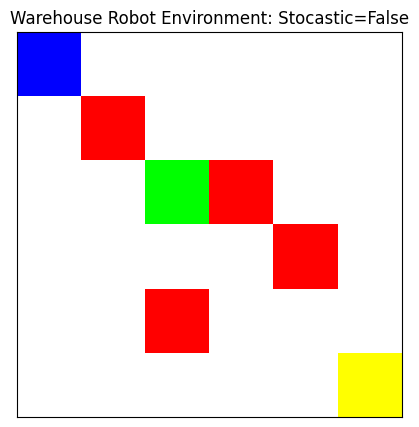

Action: Left
State: (0, 0, False), Reward: -1, Total Reward: -2

Step 3:


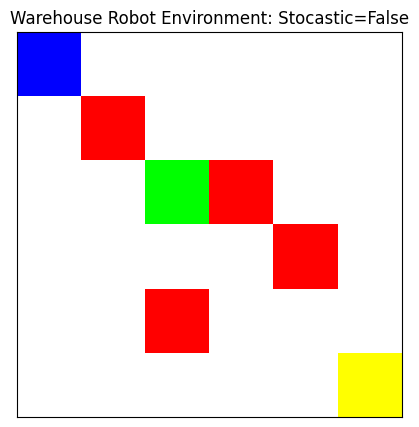

Action: Drop-off
State: (0, 0, False), Reward: -1, Total Reward: -3

Step 4:


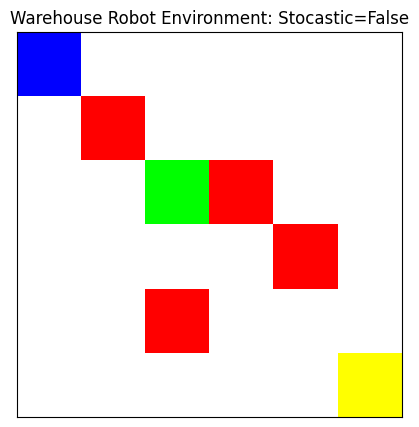

Action: Left
State: (0, 0, False), Reward: -1, Total Reward: -4

Step 5:


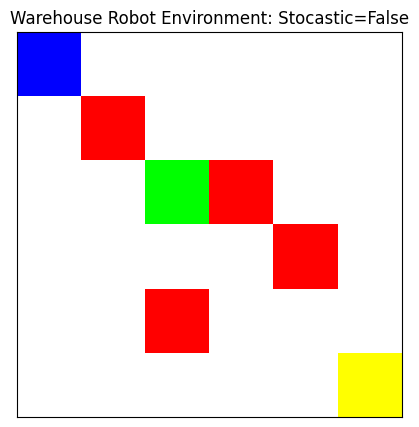

Action: Pick-up
State: (0, 0, False), Reward: -1, Total Reward: -5

Step 6:


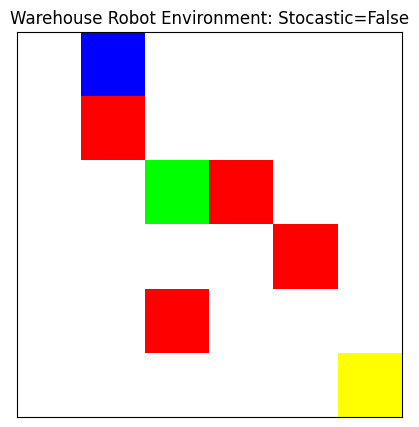

Action: Right
State: (0, 1, False), Reward: -1, Total Reward: -6

Step 7:


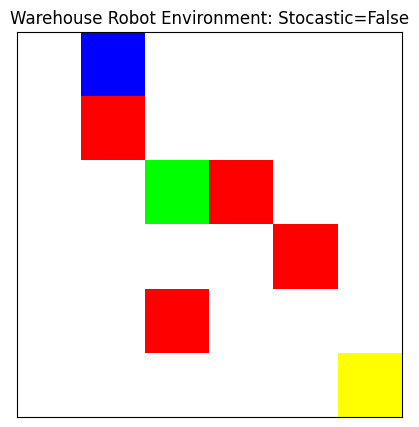

Action: Up
State: (0, 1, False), Reward: -1, Total Reward: -7

Step 8:


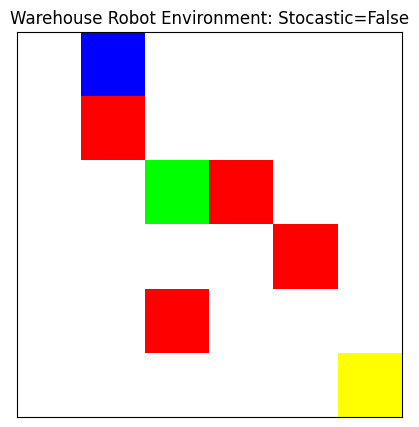

Action: Up
State: (0, 1, False), Reward: -1, Total Reward: -8

Step 9:


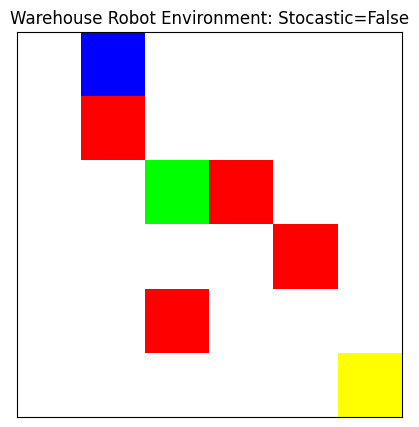

Action: Down
State: (0, 1, False), Reward: -20, Total Reward: -28

Step 10:


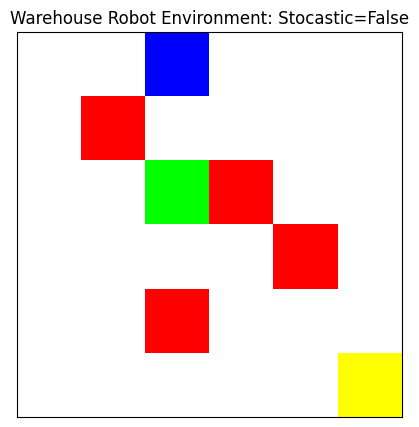

Action: Right
State: (0, 2, False), Reward: -1, Total Reward: -29


Stochastic Environment Simulation:
Step 1:


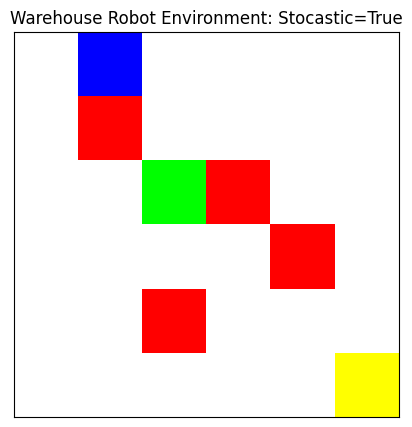

Action: Down
State: (0, 1, False), Reward: -1, Total Reward: -1

Step 2:


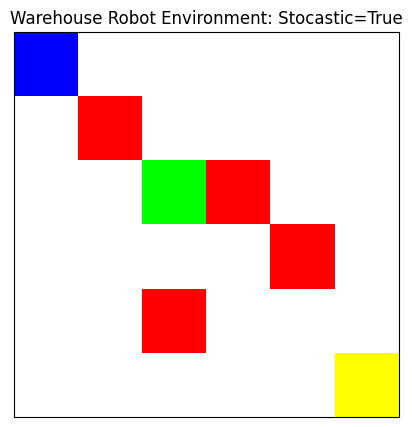

Action: Up
State: (0, 0, False), Reward: -1, Total Reward: -2

Step 3:


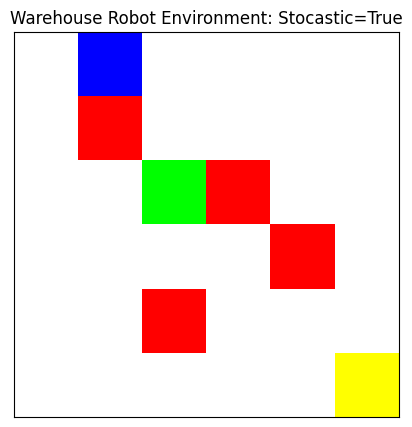

Action: Right
State: (0, 1, False), Reward: -1, Total Reward: -3

Step 4:


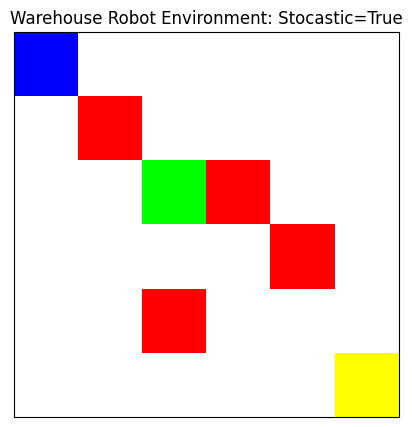

Action: Pick-up
State: (0, 0, False), Reward: -1, Total Reward: -4

Step 5:


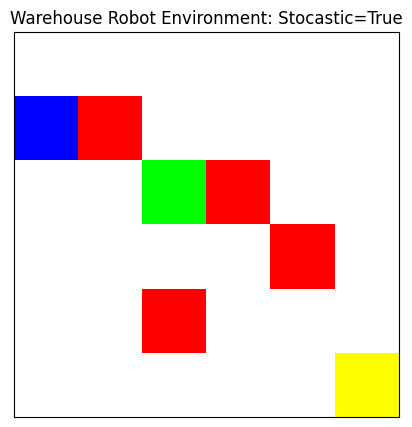

Action: Down
State: (1, 0, False), Reward: -1, Total Reward: -5

Step 6:


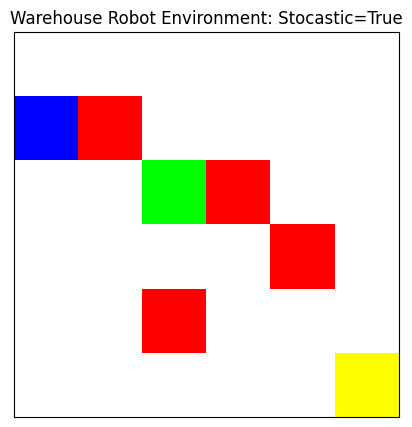

Action: Up
State: (1, 0, False), Reward: -20, Total Reward: -25

Step 7:


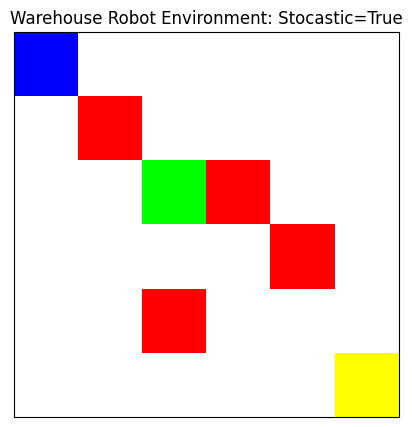

Action: Down
State: (0, 0, False), Reward: -1, Total Reward: -26

Step 8:


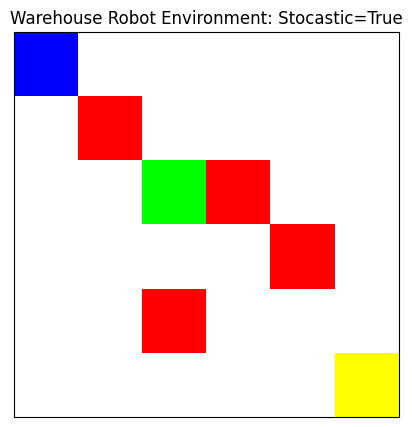

Action: Drop-off
State: (0, 0, False), Reward: -1, Total Reward: -27

Step 9:


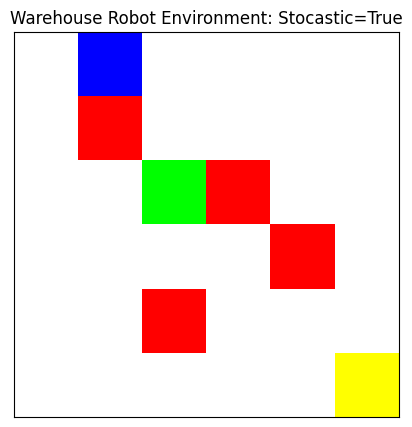

Action: Up
State: (0, 1, False), Reward: -1, Total Reward: -28

Step 10:


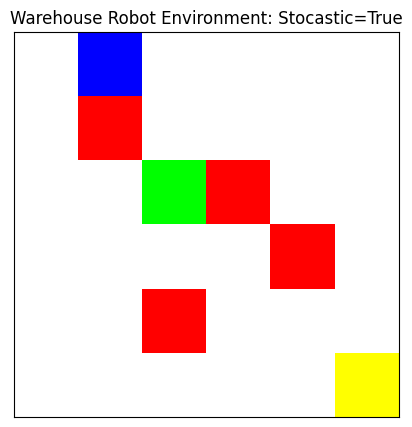

Action: Pick-up
State: (0, 1, False), Reward: -1, Total Reward: -29



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random
import time

class WarehouseRobotEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, stochastic=False):
        super(WarehouseRobotEnv, self).__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.pickup_attempted = False  # Flag to track pickup attempt was made or not
        self.carrying = False          # Flag to track if agent is carrying the package
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation()
    
    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], self.carrying)
    
    def step(self, action):

        if self.stochastic and random.random() < 0.9:
            action = random.choice([0, 1, 2, 3])  # 10% chance of random movement(stochasticity)
        
        new_pos = self.agent_position[:]
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right
        
        reward = -1  # Default step penalty to encourage efficiency
        done = False

        if new_pos in self.obstacles:
            reward = -20  # Penalty for hitting an obstacle
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size: # Check if new position is within grid bounds
            self.agent_position = new_pos  # Move only if not hitting an obstacle

        if action == 4:  # Pick-up
            if self.agent_position == self.pickup_position:
                if not self.carrying:
                    self.carrying = True
                    reward = 25  # Reward for first-time pickup
                    self.pickup_attempted = True  # Mark as attempted
                else:
                    reward = -1  # Penalty for redundant pickup

        elif action == 5:  # Drop-off
            if self.agent_position == self.dropoff_position and self.carrying:
                reward = 100  # Reward for successful delivery
                done = True  # Task complete
            elif self.carrying:
                reward = -25  # Penalty for dropping off at wrong location
            self.carrying = False  # Reset carrying state
        
        self.timesteps += 1
        self.total_reward += reward

        if self.timesteps >= 50:
            done = True  # Terminate after max steps
        
        return self._get_observation(), reward, done, {}
    
    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))  # White background

        # Set colors for different elements
        for obs in self.obstacles:
            grid[tuple(obs)] = [1, 0, 0]  # Obstacles (Red)
        
        grid[tuple(self.pickup_position)] = [0, 1, 0]  # Pickup location (Green)
        grid[tuple(self.dropoff_position)] = [1, 1, 0]  # Drop-off location (Yellow)
        grid[tuple(self.agent_position)] = [0, 0, 1]  # Agent (Blue)

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot Environment: Stocastic={self.stochastic}")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()
        time.sleep(0.1)  # Pause to visualize movement step by step

# Function to simulate an environment
def run_simulation(stochastic=False):
    print(f"\n{'Stochastic' if stochastic else 'Deterministic'} Environment Simulation:")
    env = WarehouseRobotEnv(stochastic=stochastic)
    obs = env.reset()
    total_reward = 0
    
    for step in range(10):
        action = env.action_space.sample()  # Choosing random random action from 0-5 (Up, Down, Left, Right, Pick-up, Drop-off)
        next_obs, reward, done, _ = env.step(action)
        total_reward += reward

        print(f"Step {step + 1}:")
        env.render()
        action_names = ['Up', 'Down', 'Left', 'Right', 'Pick-up', 'Drop-off']
        print(f"Action: {action_names[action]}")
        print(f"State: {next_obs}, Reward: {reward}, Total Reward: {total_reward}\n")
        
        if done:
            break

# Main function to run both simulations
def main():
    run_simulation(stochastic=False)  # Deterministic run
    run_simulation(stochastic=True)  # Stochastic run

if __name__ == "__main__":
    main()


Q- Learning Algorithm

Episode 0, Reward: -32049, Epsilon: 0.995
Episode 100, Reward: -31779, Epsilon: 0.6027415843082742
Episode 200, Reward: -22726, Epsilon: 0.36512303261753626
Episode 300, Reward: -30643, Epsilon: 0.2211807388415433
Episode 400, Reward: -20851, Epsilon: 0.13398475271138335
Episode 500, Reward: -7121, Epsilon: 0.0811640021330769
Episode 600, Reward: -10589, Epsilon: 0.04916675299948831
Episode 700, Reward: -4440, Epsilon: 0.029783765425331846
Episode 800, Reward: -6063, Epsilon: 0.018042124582040707
Episode 900, Reward: -752, Epsilon: 0.010929385683282892

Initial Q-table for Stochastic Environment:
Too large to print fully, showing a sample: [((0, 0, 0), array([-257.41644958, -260.14726341, -258.78818446, -258.69438669,
       -257.51247009, -257.97437903])), ((0, 0, 1), array([-241.92907424, -248.27226172, -251.0755236 , -249.26437867,
       -248.81750421, -252.73806522])), ((0, 1, 0), array([-254.596562  , -273.07663212, -271.79822909, -270.86387678,
       -269.59067542, -269.2575190

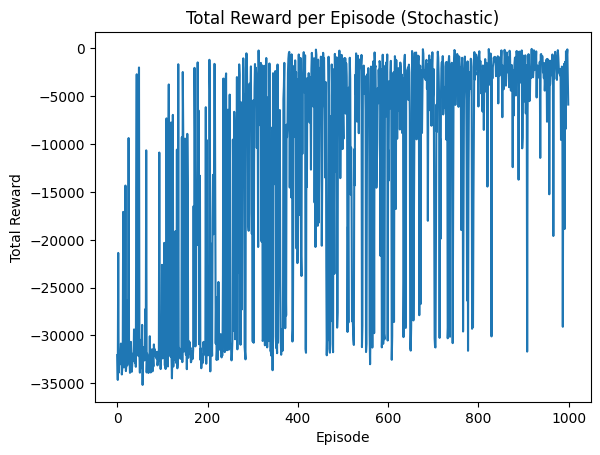

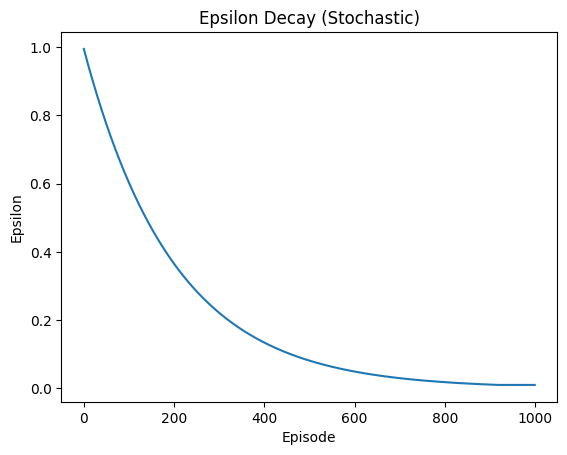

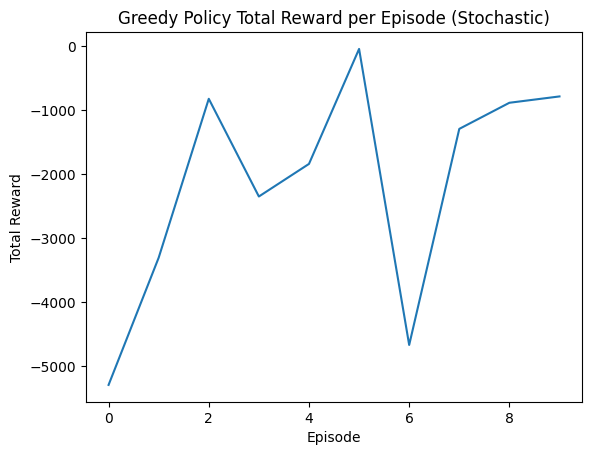


Rendering one episode with learned policy:


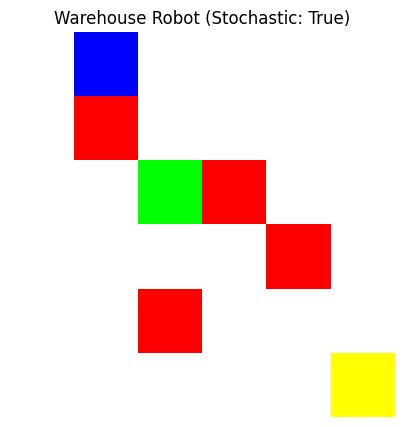

Action: Up, Reward: -1


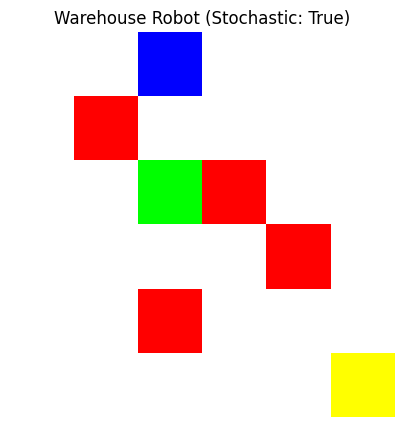

Action: Up, Reward: -1


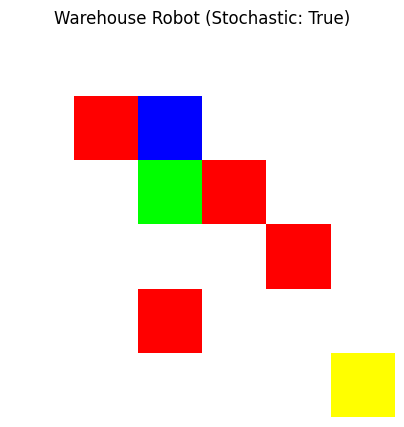

Action: Pickup, Reward: -1


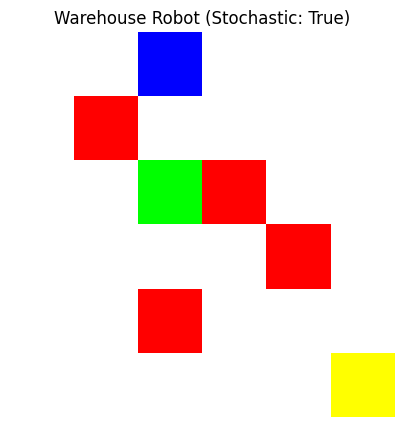

Action: Up, Reward: -1


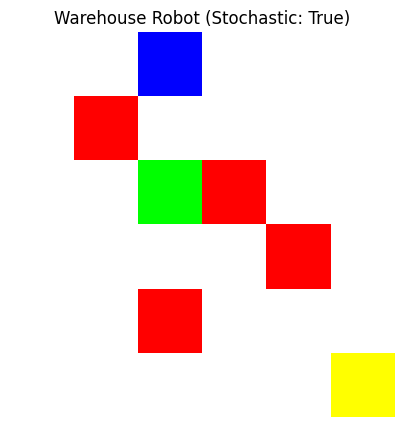

Action: Pickup, Reward: -1


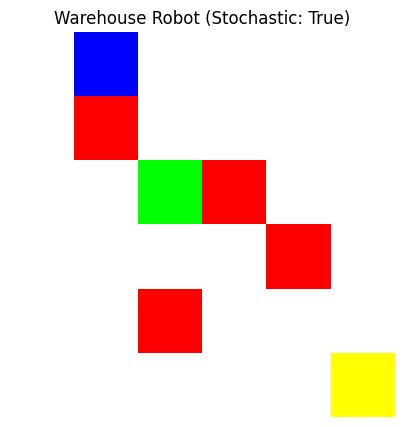

Action: Pickup, Reward: -1


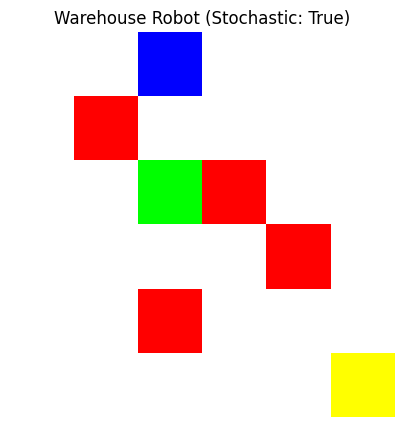

Action: Up, Reward: -1


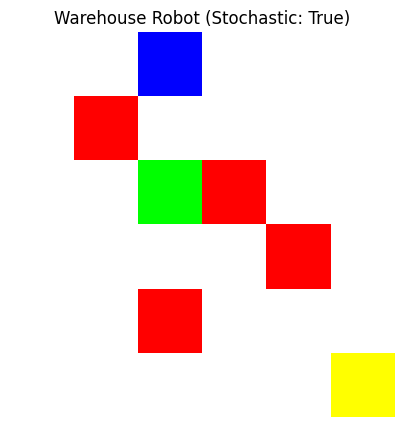

Action: Pickup, Reward: -1


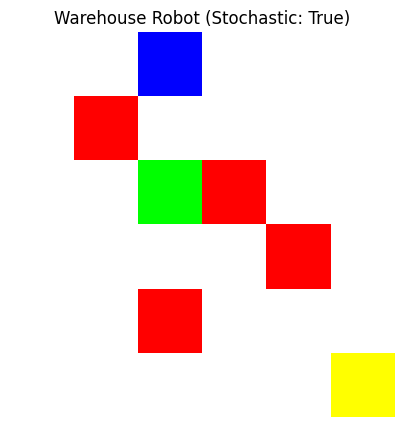

Action: Pickup, Reward: -1


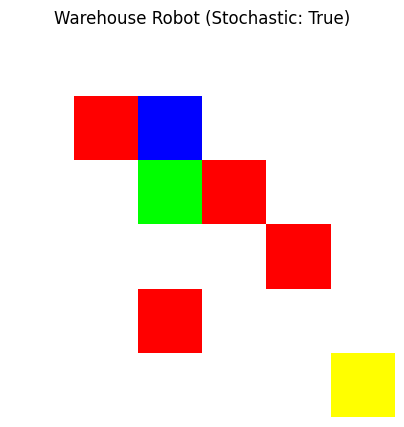

Action: Pickup, Reward: -1


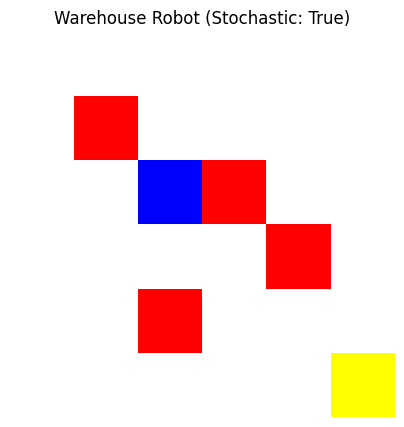

Action: Up, Reward: -1


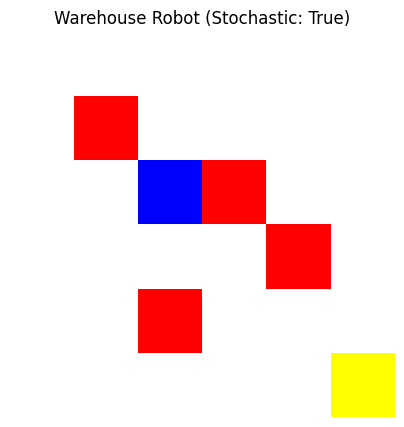

Action: Pickup, Reward: -20


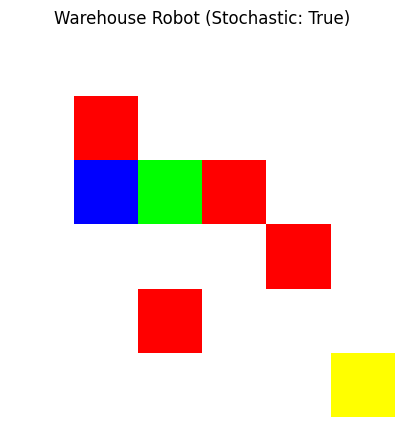

Action: Pickup, Reward: -1


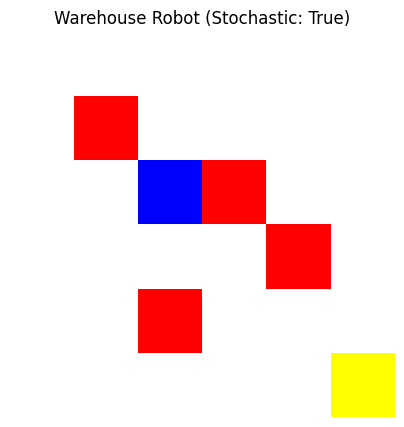

Action: Down, Reward: -1


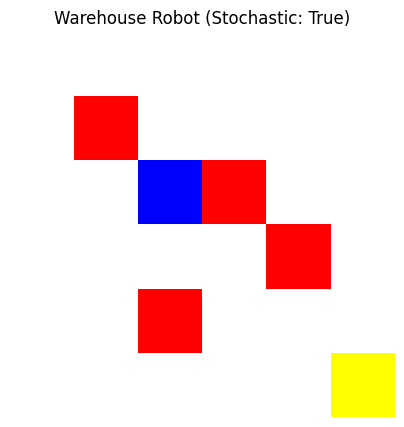

Action: Pickup, Reward: -20


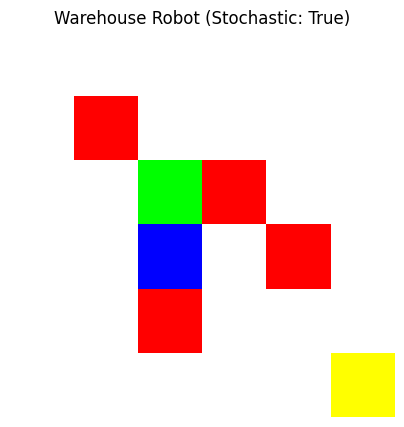

Action: Pickup, Reward: -1


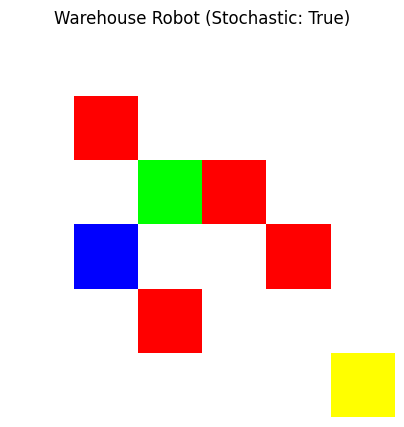

Action: Right, Reward: -1


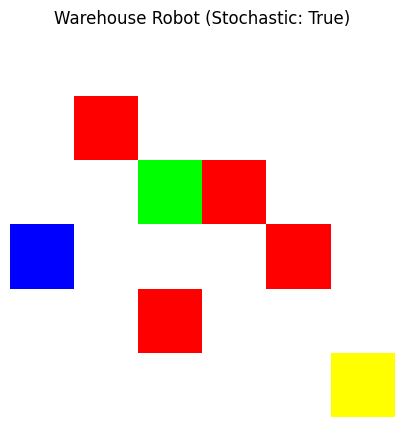

Action: Up, Reward: -1


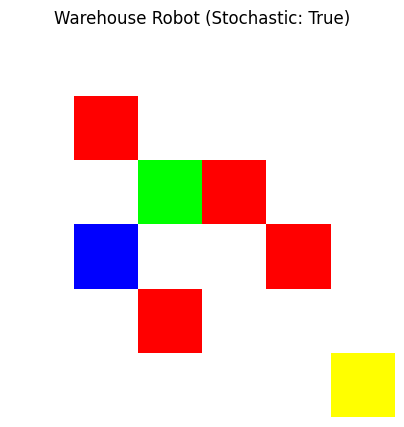

Action: Up, Reward: -1


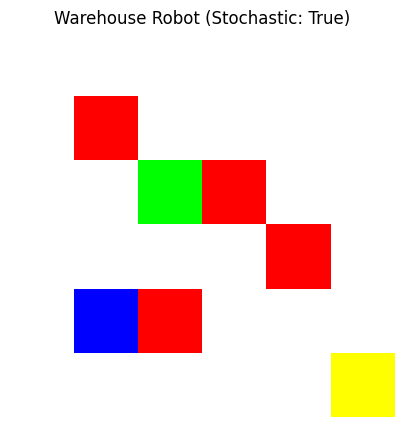

Action: Up, Reward: -1


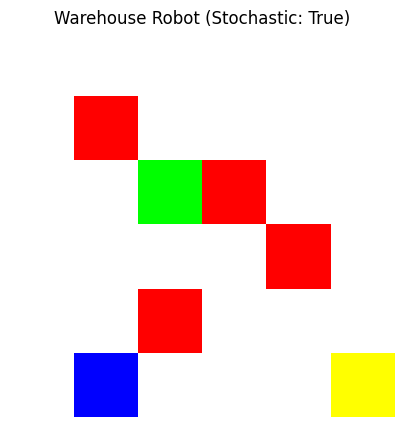

Action: Down, Reward: -1


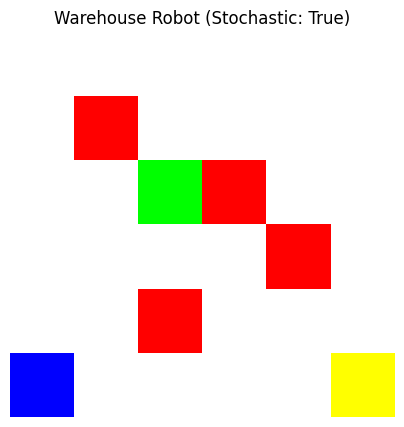

Action: Pickup, Reward: -1


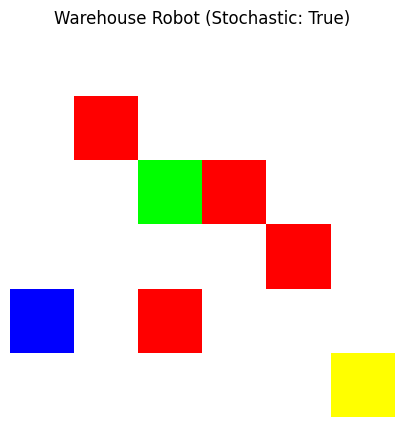

Action: Pickup, Reward: -1


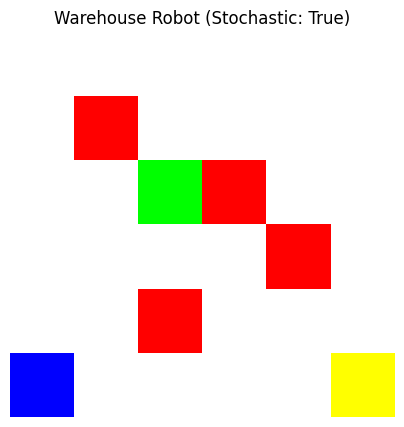

Action: Dropoff, Reward: -1


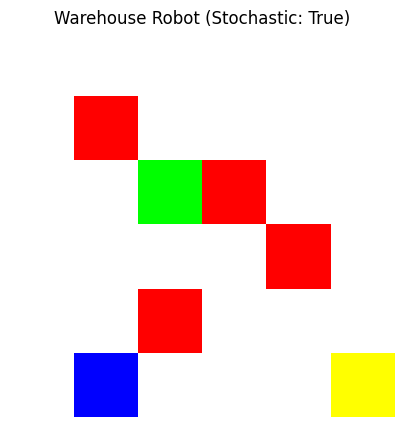

Action: Pickup, Reward: -1


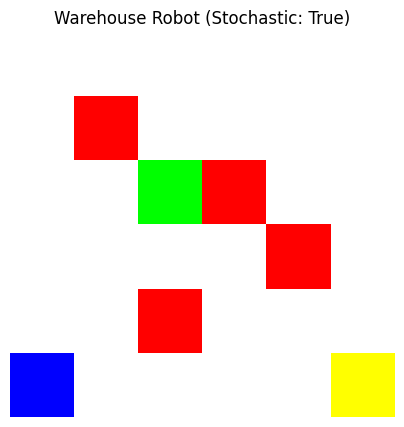

Action: Pickup, Reward: -1


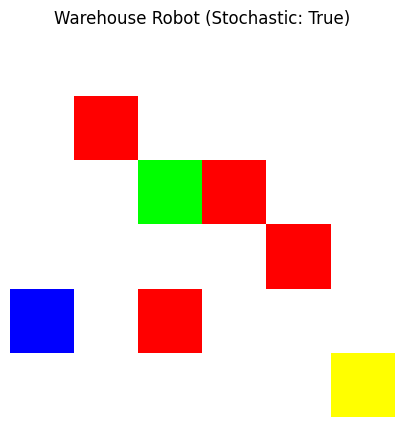

Action: Pickup, Reward: -1


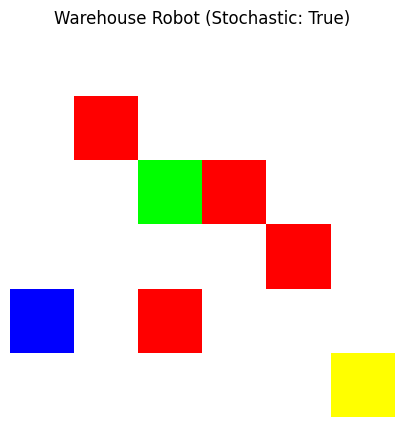

Action: Dropoff, Reward: -1


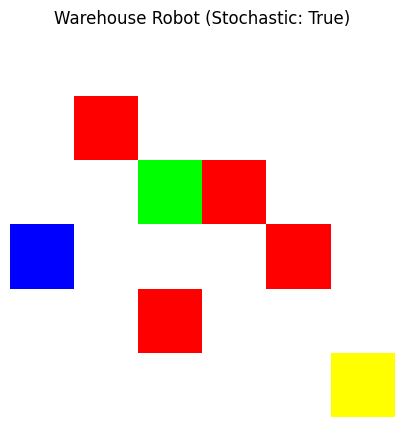

Action: Dropoff, Reward: -1


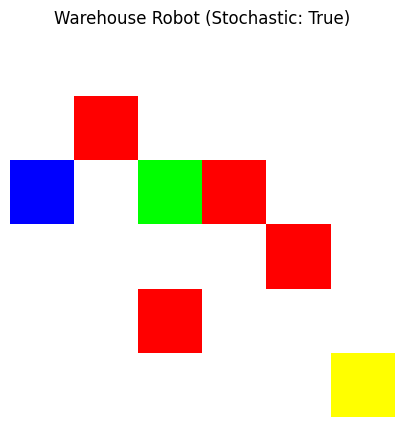

Action: Up, Reward: -1


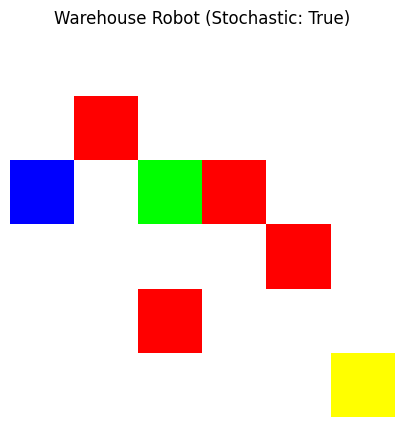

Action: Dropoff, Reward: -1


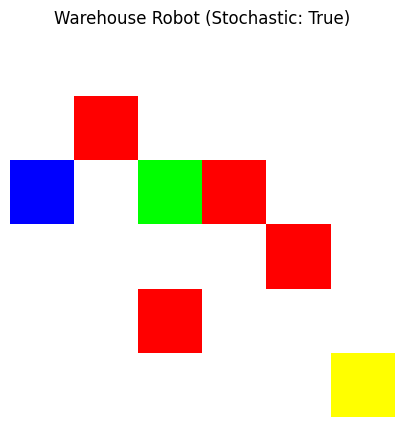

Action: Dropoff, Reward: -1


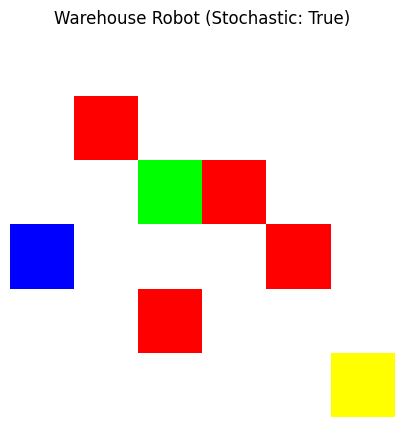

Action: Dropoff, Reward: -1


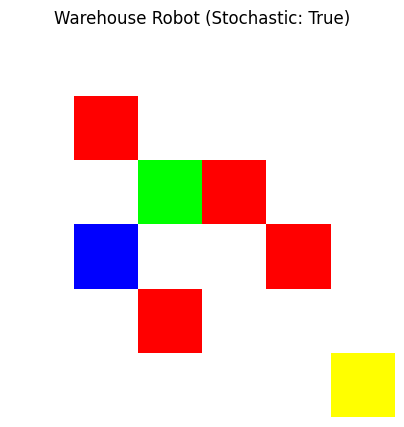

Action: Up, Reward: -1


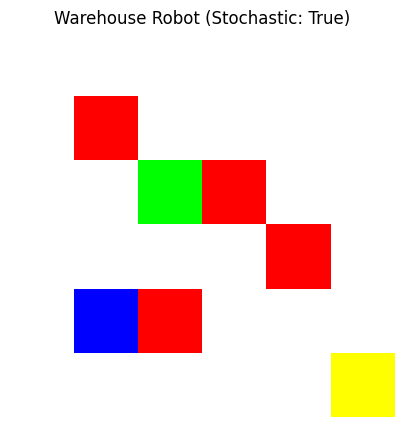

Action: Up, Reward: -1


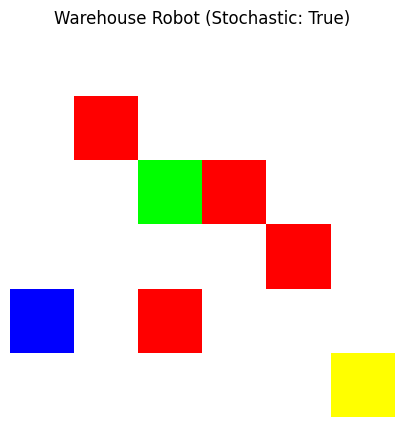

Action: Down, Reward: -1


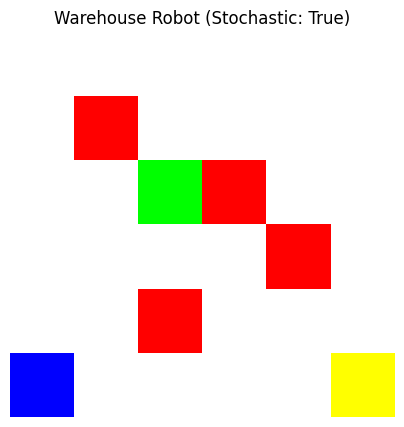

Action: Dropoff, Reward: -1


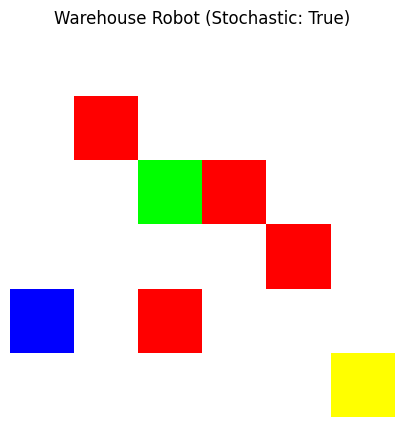

Action: Pickup, Reward: -1


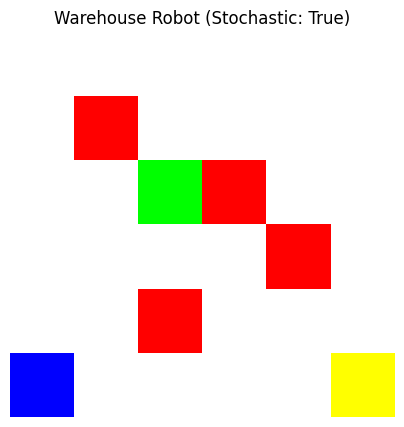

Action: Dropoff, Reward: -1


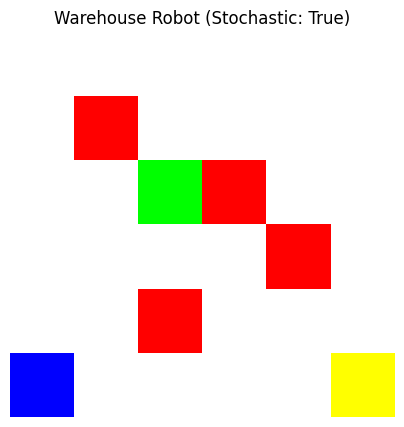

Action: Pickup, Reward: -1


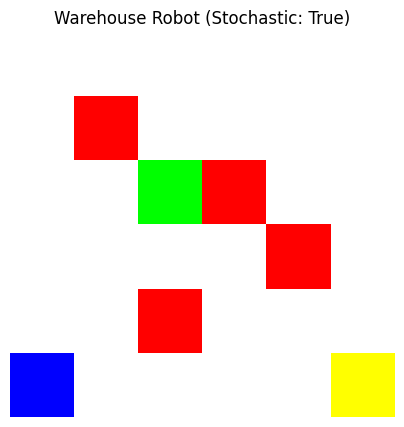

Action: Pickup, Reward: -1


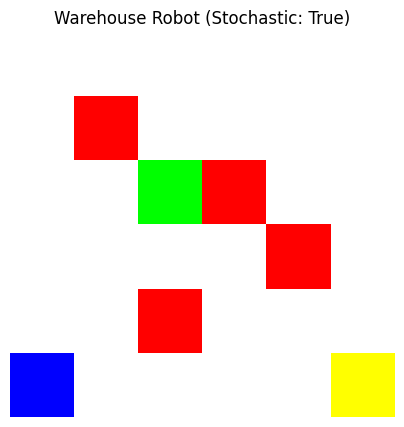

Action: Pickup, Reward: -1


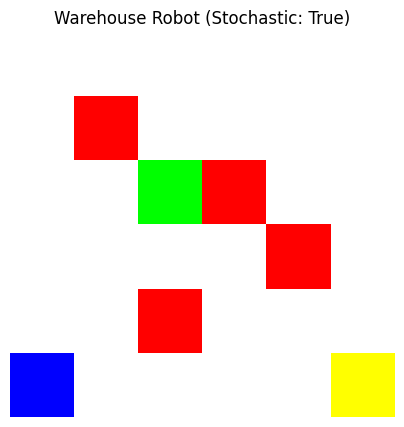

Action: Pickup, Reward: -1


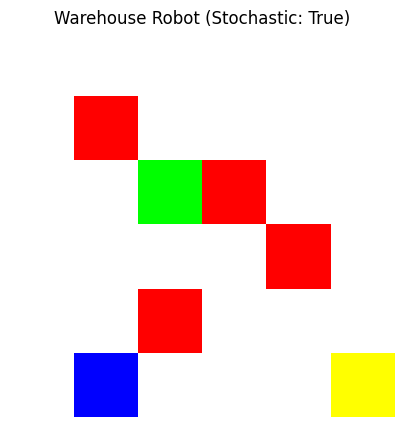

Action: Pickup, Reward: -1


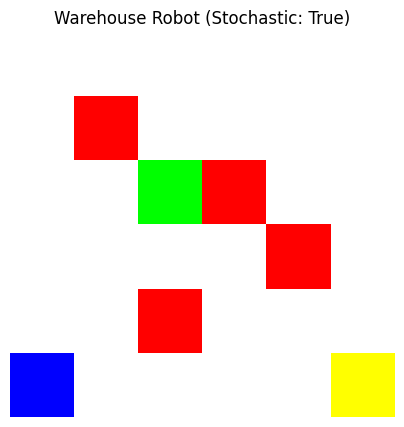

Action: Pickup, Reward: -1


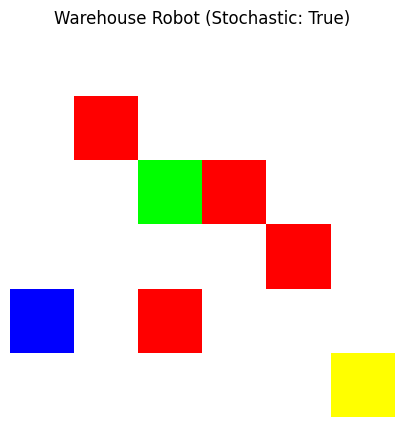

Action: Pickup, Reward: -1


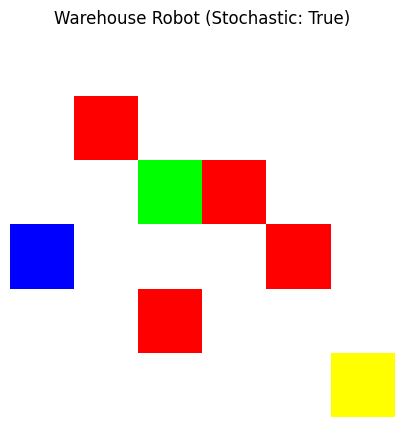

Action: Dropoff, Reward: -1


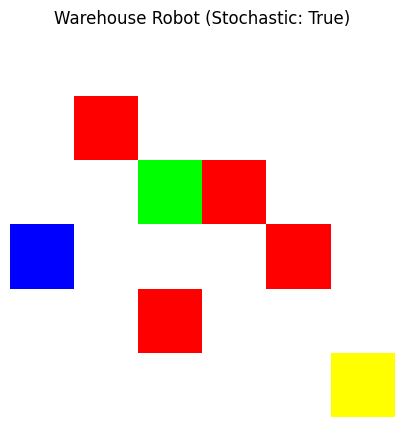

Action: Up, Reward: -1


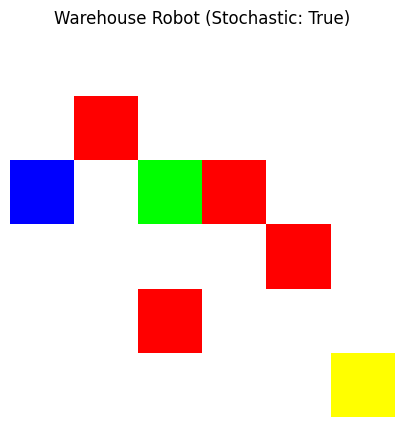

Action: Up, Reward: -1


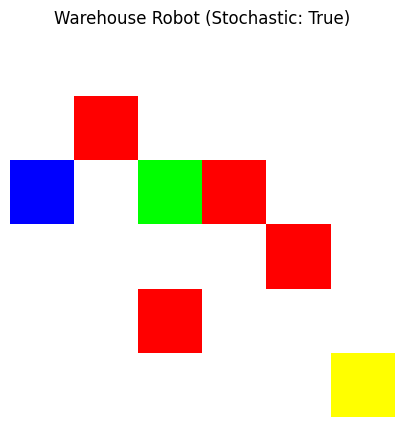

Action: Dropoff, Reward: -1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle

class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False):
        super().__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.pickup_attempted = False
        self.carrying = False
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # Handle stochastic movement
        if self.stochastic and random.random() < 0.9:
            action = random.choice([0, 1, 2, 3])

        new_pos = self.agent_position.copy()
        if action == 0: new_pos[0] -= 1  # Up
        elif action == 1: new_pos[0] += 1  # Down
        elif action == 2: new_pos[1] -= 1  # Left
        elif action == 3: new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if action == 4:  # Pick-up
            if self.agent_position == self.pickup_position and not self.carrying:
                self.carrying = True
                reward = 25
                self.pickup_attempted = True
            elif self.carrying:
                reward = -1

        elif action == 5:  # Drop-off
            if self.agent_position == self.dropoff_position and self.carrying:
                reward = 100
                terminated = True  # Successful termination
            elif self.carrying:
                reward = -25
            self.carrying = False

        # Handle time-based truncation
        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode truncation due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Set element colors
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]  # Obstacles
        grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]  # Pickup
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]  # Dropoff
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]  # Agent

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

def q_learning(env, episodes, max_step=10000, alpha=0.2, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states in the grid with both carrying statuses.
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in [0, 1]:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0  # Initialize step counter for the current episode
        
        while not done and step_count < max_step:
            # Choose action using an epsilon-greedy strategy
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                # Ensure state exists in the Q-table (should always be true after initialization)
                if state not in q_table:
                    q_table[state] = np.zeros(env.action_space.n)
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            
            # Initialize next_state in Q-table if it doesn't exist
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Q-learning update
            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value
            
            state = next_state
            total_reward += reward
            step_count += 1  # Increment the step counter
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

def run_simulation_with_q_learning(stochastic=False):
    env = WarehouseRobotEnv(stochastic)
    episodes = 1000
    q_table, rewards, epsilons = q_learning(env, episodes)
    
    # Save Q-table
    with open(f'q_table_{"stochastic" if stochastic else "deterministic"}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Print Q-tables
    print(f"\nInitial Q-table for {'Stochastic' if stochastic else 'Deterministic'} Environment:")
    print("Too large to print fully, showing a sample:", list(q_table.items())[:10])
    
    print(f"\nFinal Q-table for {'Stochastic' if stochastic else 'Deterministic'} Environment:")
    print("Too large to print fully, showing a sample:", list(q_table.items())[-10:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"Total Reward per Episode ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"reward_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"Epsilon Decay ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"epsilon_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Greedy policy for 10 episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"Greedy Policy Total Reward per Episode ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Render one episode with greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with learned policy:")
    for _ in range(50):  # max steps
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        print(f"Action: {['Up','Down','Left','Right','Pickup','Dropoff'][action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

if __name__ == "__main__":
    # run_simulation_with_q_learning(stochastic=False)
    run_simulation_with_q_learning(stochastic=True)